In [1]:
#importing all the necessary libraries required for the algorithm
import numpy as np
import math
import copy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the data's given
df = pd.read_csv('linear_train.csv')
arr = df.to_numpy()
x_values = arr[:,1:21]
y_values = arr[:,21]
#for finding number of training examples and number of features
m = len(x_values)
n = len(df.columns)-2

#to view the csv file

In [3]:
#to assign initial values to w and b
w_init = np.zeros(n,)
b_init = 0

In [4]:
#to find mean
def mean(x_values,m,n):
    mean = np.zeros(n,)
    for j in range(n):
        mean[j]  = (np.sum(x_values[:,j]))/m
    return mean

In [5]:
#to find standard deviation
def std_deviation(x_values,mean,m,n):
    summation = np.zeros(n,)
    standard_deviation = np.zeros(n,)
    for j in range(n):
        summation[j] = (np.sum((x_values[:,j]-mean[j])**2))/m
        standard_deviation[j] = math.sqrt(summation[j])
    return standard_deviation

In [6]:
#implementing the z score normalization
def z_score(x_values,m,n):
    avg = mean(x_values,m,n)
    standard_deviation = std_deviation(x_values,avg,m,n)
    x_modified = np.zeros_like(x_values)
    for j in range(n):
        x_modified[:,j]= ((x_values[:,j]-avg[j])/standard_deviation[j])
    return x_modified

In [7]:
def z_score(x_values):
    avg = np.mean(x_values,axis=0)
    std_deviation = np.std(x_values,axis=0)
    x = (x_values-avg)/std_deviation
    return x

In [8]:
#finding cost function
def cost_func(x_values,y_values,m,w,b):
    y_predicted=np.zeros(m)
    cost=0
    for i in range(m):
        #finding the predicted value of y (y_cap)
        y_predicted[i] = ((np.dot(w,x_values[i]))+b)
    #finding cost
    cost = np.sum((y_predicted-y_values)**2)
    final_cost = (cost/(2*m)) 
    return final_cost

In [9]:
#to find rmse
def rmse(x_values,y_values,m,w,b):
    cost = cost_func(x_values,y_values,m,w,b)
    rms = math.sqrt((cost)*2)
    return rms

In [10]:
def r2(x_values,y_values,w,b,m,n):
    y_cap = (np.matmul(x_values,w)+b)
    y_mean = np.sum(y_values)/m
    r2 = np.sum((y_values-y_cap)**2)/np.sum((y_values-y_mean)**2)
    return 1-r2

In [11]:
#finding the derivative of w and b 
def derivative(x_values,y_values,m,n,w,b):
    y_predicted = np.zeros(m)
    derivative_w = np.zeros(n)
    derivative_b=0
    #finding the predicted value 
    y_predicted = (np.matmul(x_values,w)+b)
    #finding the loss
    loss = (y_predicted-y_values)
    for j in range(n):
        derivative_w[j] = np.sum((loss*x_values[:,j]))
    derivative_b = np.sum(loss)
    derivative_w = derivative_w/m
    derivative_b = derivative_b/m
    
    return derivative_w,derivative_b

In [12]:
def gradiant_decent(x_values,y_values,m,n,w,b,alpha,num_iterations):
    w_temp = copy.deepcopy(w)
    b_temp = b
    loss_arr = np.zeros(num_iterations)
    #running loop of 'no. of iterations times':
    for i in range(num_iterations):
        #finding derivative of w and b
        derivative_w,derivative_b = derivative(x_values,y_values,m,n,w_temp,b_temp)
        #changing the values of w and b
        w_temp = w_temp - (alpha*derivative_w)
        b_temp = b_temp - (alpha*derivative_b)
        #storing the loss
        loss_arr[i]=cost_func(x_values,y_values,m,w_temp,b_temp)
        #printing the loss
        if(i%50==0):
            loss = cost_func(x_values,y_values,m,w_temp,b_temp)
            rms = rmse(x_values,y_values,m,w_temp,b_temp)
            print("The loss after "+str(i)+" iterations is "+str(loss)+" and the rmse is "+str(rms))
    return w_temp,b_temp,loss_arr

In [13]:
def multi_linear_regression(x_values,y_values,m,n,w,b,alpha,num_iterations):
    loss_array = np.zeros(num_iterations)
    w_tmp,b_tmp,loss_array = gradiant_decent(x_values,y_values,m,n,w,b,alpha,num_iterations)
    print("The values of w and b are "+str(w_tmp)+" "+str(b_tmp))
    return w_tmp,b_tmp,loss_array

In [14]:
w_final = np.zeros(n,)
b_final = 0
losses_array = np.zeros(1001)
x_modified = z_score(x_values)
w_final,b_final,losses_array= multi_linear_regression(x_modified,y_values,m,n,w_init,b_init,0.01,1001)

The loss after 0 iterations is 29785.029539374613 and the rmse is 244.0697832152707
The loss after 50 iterations is 13216.9524770037 and the rmse is 162.5850698988299
The loss after 100 iterations is 7772.891408789139 and the rmse is 124.6827286258136
The loss after 150 iterations is 5859.370102209976 and the rmse is 108.25313022919916
The loss after 200 iterations is 5168.1892171557265 and the rmse is 101.6679813624302
The loss after 250 iterations is 4915.899646084229 and the rmse is 99.15542996814878
The loss after 300 iterations is 4823.436795898406 and the rmse is 98.21849923408935
The loss after 350 iterations is 4789.492475033252 and the rmse is 97.87228897939653
The loss after 400 iterations is 4777.020812432843 and the rmse is 97.74477799282009
The loss after 450 iterations is 4772.436194845141 and the rmse is 97.69786276930668
The loss after 500 iterations is 4770.750208605941 and the rmse is 97.6806040993394
The loss after 550 iterations is 4770.129969831078 and the rmse is 

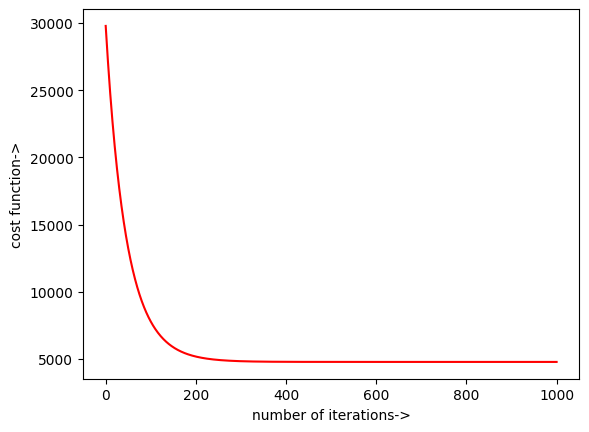

In [19]:
#plot the graph of iterations vs cost function
plt.plot(np.arange(1001),losses_array,c='r')
plt.xlabel('number of iterations->')
plt.ylabel('cost function->')
plt.show()

In [16]:
r2(x_modified,y_values,w_final,b_final,m,n)

0.8428783212232978